# Analiza podjetji

V tej projektni nalogi bom analiziral najbogatejša podjetja na svetu. Podtke sem zajel na internetni strani [value.today](https://www.value.today/world-top-1000-companies-as-on-dec-25-2022?title=&field_headquarters_of_company_target_id=All&field_company_category_primary_target_id&field_market_cap_dec_25_2022__value=&page=0).  

In [144]:
import pandas as pd
pd.set_option('display.max_rows', 20)
%matplotlib inline
podjetja = pd.read_csv('obdelani_podatki/podjetja.csv',index_col='ime')

In [145]:
podjetja

,Sedež,Svetovni rang 2025,Tržna kapitalzicija Dec-25-2022 (Billion $),Svetovni rang Jan 2022,Tržna vrednost Jan 2022 (Billion $),Kategorija,Število zaposlenih,Letni dohodek (Million $),Neto dohodek (Million $)
ime,,,,,,,,,
APPLE,USA,1,2286.0,1.0,2825.0,Technology,164000.0,394330.0,99803.0
SAUDI ARABIAN OIL COMPANY (Saudi Aramco),Saudi Arabia,2,1841.0,3.0,1890.0,Energy,79800.0,400460.0,105380.0
MICROSOFT CORPORATION,USA,3,1780.0,2.0,2358.0,Technology,220000.0,198270.0,72738.0
ALPHABET,USA,4,1162.0,4.0,1820.0,Technology,190234.0,282840.0,59972.0
AMAZON.COM,USA,5,868.0,5.0,1649.0,eCommerce,1541000.0,513980.0,2722.0
...,...,...,...,...,...,...,...,...,...
CF INDUSTRIES HOLDINGS,USA,937,18.0,1365.0,15.0,Basic Materials,2700.0,11186.0,3346.0
WELLCARE HEALTH PLANS,USA,938,NaN,938.0,NaN,Healthcare,14000.0,NaN,NaN
CEZ A. S,Czech Republic,938,18.0,1031.0,20.0,Utilities,27200.0,9595.0,398.0


Najprej poglejmo katera podjetja bodo napovedano najhitreje rastoča iz leta 2022-2025

In [146]:
podjetja['rast'] = podjetja['Svetovni rang Jan 2022'] - podjetja['Svetovni rang 2025']
podjetja.sort_values(by='rast',inplace= True,ascending=False)
podtabela = podjetja[['Sedež','rast']].copy()
print(podtabela.head(20))


                                                  Sedež    rast
ime                                                            
PT BAYAN RESOURCES TBK                        Indonesia  2396.0
E. I. DU PONT DE NEMOURS AND COMPANY                USA  2374.0
CENTRAIS ELETRICAS BRASILEIRAS - ELETROBRAS      Brazil  1277.0
TEXAS PACIFIC LAND TRUST                            USA  1061.0
WOODSIDE ENERGY GROUP                         Australia   942.0
AGNICO EAGLE MINES                               Canada   887.0
AKER BP ASA                                      Norway   823.0
DELTA ELECTRONICS (THAILAND) PUBLIC COMPANY    Thailand   718.0
EDISON INTERNATIONAL                                USA   717.0
TENARIS                                      Luxembourg   708.0
SOCIEDAD QUIMICA Y MINERA DE CHILE                Chile   695.0
STEEL DYNAMICS                                      USA   662.0
ENPHASE ENERGY                                      USA   654.0
VICI PROPERTIES                         

Oglejmo si sedaj še katere države si lastijo največ korporacijskih gigantov.

<Axes: xlabel='Sedež'>

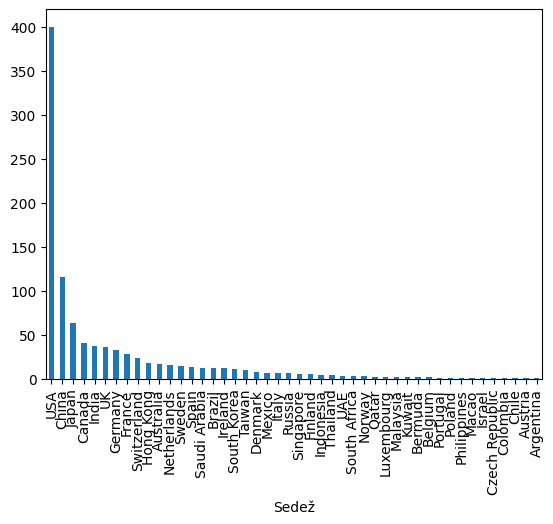

In [147]:
stevilo_podjetji_po_drzavah = podjetja.groupby(by=['Sedež']).size()
stevilo_podjetji_po_drzavah.sort_values(inplace= True,ascending=False)
stevilo_podjetji_po_drzavah.plot.bar()



Po tem podatku lahko vidimo kako si ena država lasti večino najmočnejših podjetji na svetu in posledično tudi drži monopol v svetu.

Seveda nas zanima v kateri državi giganti v povprečju najhitreje rasejo, saj v primeru dosti drugačnega grafa kot je zgoraj bi dajal veliko bolj svetlejšo luč večji enakosti po svetu.

<Axes: xlabel='Sedež'>

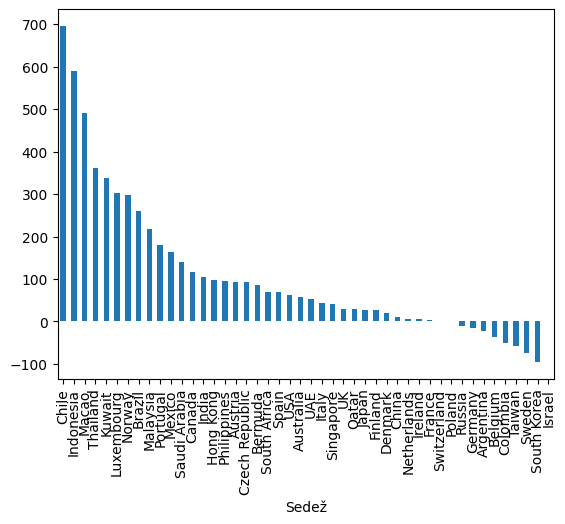

In [148]:
rast_podjetji_po_drzavah = podjetja.groupby(by='Sedež')['rast'].mean()
rast_podjetji_po_drzavah.sort_values(inplace= True,ascending=False)
rast_podjetji_po_drzavah.plot.bar()

Graf seveda pokaže visoko rast azijskega in južno ameriškega trga kar je zelo pozitivna stvar, če želimo, da bo ekonomija po celem svetu enako močna. Seveda pa ni vse v moči držav zelo zanimivo bi bilo videti kakšna je razporeditev zaposlenih glede na tržno kapitalizacijo podjetja.

<Axes: xlabel='Zaokrožena tržna kapitalizacija'>

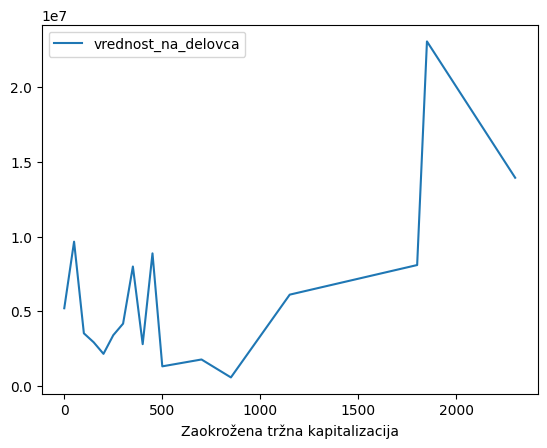

In [149]:
podjetja['vrednost_na_delovca'] = 1000000000*podjetja['Tržna kapitalzicija Dec-25-2022 (Billion $)']/podjetja['Število zaposlenih']
podjetja['Zaokrožena tržna kapitalizacija'] = round(podjetja['Tržna kapitalzicija Dec-25-2022 (Billion $)'] / 50) * 50
podtabela2 = podjetja[['Zaokrožena tržna kapitalizacija','vrednost_na_delovca']].copy()
podtabela2
podtabela2.groupby(by='Zaokrožena tržna kapitalizacija').agg({'vrednost_na_delovca':'mean'}).plot()

Sedaj bomo analizirali še dubičke glede na Kategorijo podjetji, torej katera usmerjenost prinaša najvišji čisti dubiček Bruto/Neto dohodek.

In [ ]:
podjetja['vrednost_na_delovca'] = 1000000000*podjetja['Tržna kapitalzicija Dec-25-2022 (Billion $)']/podjetja['Število zaposlenih']